In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
iris.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X , y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [3]:
X2 = X[:,:2]
X2[:5,:]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

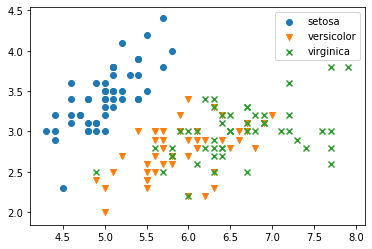

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X2[:,0][y == 0], X2[:, 1][y == 0], marker = 'o')
plt.scatter(X2[:,0][y == 1], X2[:, 1][y == 1], marker = 'v')
plt.scatter(X2[:,0][y == 2], X2[:, 1][y == 2], marker = 'x')
plt.legend(iris.target_names)
plt.show()

In [5]:
y2 = y.copy()
y2[y2 == 2] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5)

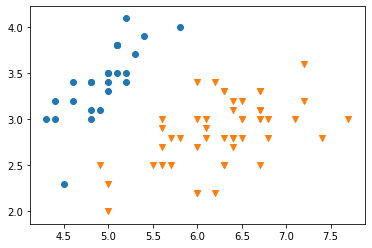

In [7]:
plt.scatter(X_train[:,0][y_train == 0], X_train[:, 1][y_train == 0], marker = 'o')
plt.scatter(X_train[:,0][y_train == 1], X_train[:, 1][y_train == 1], marker = 'v')

In [8]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, y_train)

model.coef_, model.intercept_

(array([[ 124.07089766, -215.55174385]]), array([-79.52600548]))

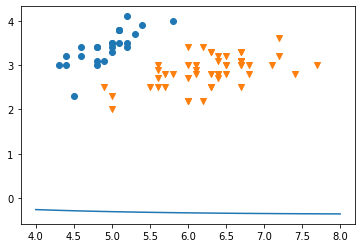

In [9]:
import numpy as np

a = model.coef_[0][0]
b = model.coef_[0][1]
c = model.intercept_[0]

xx = np.linspace(4, 8, 100)
yy = (-a/b) ** xx + -(c/b)
plt.plot(xx, yy)

plt.scatter(X_train[:,0][y_train == 0], X_train[:, 1][y_train == 0], marker = 'o')
plt.scatter(X_train[:,0][y_train == 1], X_train[:, 1][y_train == 1], marker = 'v')
plt.show()

In [10]:
model.predict([[4.5 , 3.5]])

array([0])

In [11]:
model.score(X2, y2), model.score(X_train, y_train), model.score(X_test, y_test)

(0.9133333333333333, 0.9066666666666666, 0.92)